# Notes on Machine Learning

The general procedure of Machine Learning works as follows
1. Formulate a Question
2. Finding and Understanding the Data
3. Cleaning the Data and Feature Engineering
4. hoosing a Model
5. Tuning and Evaluating
6. Using the Model and Presenting Results

**Scikit-learn** is a library in Python that provides many unsupervised and supervised learning algorithms.

**TensorFlow Probability** is a Python library built on TensorFlow that makes it easy to combine probabilistic models and deep learning on modern hardware.

## Linear Regression

Regression is used to predict outputs that are *continuous*

*******************************************************************************************************************************
#### Aside: Distance Formula
   For two sets of points $[a_1,a_2]$ and $[b_1,b_2]$ 
* **Euclidean Distance**
    $d = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2}$
* **Manhattan Distance**
    $d = |a_1 - b_1| + |a_2 - b_2|$
* **Hamming Distance**
    Hamming distance tells us how many points are equal, for example: the two strings 'there' and typo 'thete' would have a Hamming distance of 1. We can do this for lists too. Note: both objects must have the same dimensions.
    
There are specific functions in SciPy for calculating these too: distance.euclidean(), distance.cityblock(), distance.hamming()
*******************************************************************************************************************************

When we plot a linear regression, each data point has a loss from the *true* value, which measures how bad the model's prediction was. The loss is the *squared distance* from the point to the line. We want to *minimise* the losses, see **Least Squares as Maximum Likelihood Estimator** in **Notes on Statistics & Modelling** (that's essentially whats going on).

To test out using **Linear Regression** I'm going to create a random set of $x$ values and sort it for our linear fit. To generate our 'fake' data we fit $y = mx + b$ and then 'randomise' it by adding *normally distributed noise*. The notation for this is:
$$ D \sim \mathcal{N} \left(M(\theta), \sigma_{obi}^2 \right) $$
$$ M(\theta) = \alpha (mx + b) $$

where $M(\theta)$ is our model, which in this case is *linear*, $\alpha$ represents the **activation**(?).

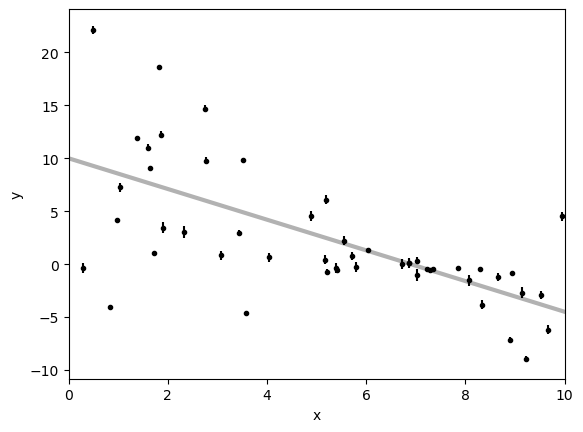

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Linear Regression: y = mx + b
'''

np.random.seed(101) # --> same set of random numbers appear every time.

# Choose the "true" parameters --> thick grey line in graph.
m_true = -1.45 
b_true = 10
f_true = 1 # --> determines how spread our y-values are. 0 is perfec 

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N)) # --> gives N random variables between 0 and 10
yerr = 0.1 + 0.5 * np.random.rand(N) # --> random error values 
y = m_true * x + b_true # --> 'true' y value
y += np.abs(f_true * y) * np.random.randn(N) # --> adds N normally distributed random values
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 50)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");